<a href="https://colab.research.google.com/github/Pramila15/Big-Data-Smart-res/blob/main/BDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cassandra.cluster import Cluster
from itertools import chain
cluster = Cluster()

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sqlalchemy import create_engine
import vaex
import dask

In [ ]:
session = cluster.connect('restaurant')

In [ ]:
session.execute('USE restaurant')

In [ ]:
query1='SELECT * FROM zomato'
df=pd.DataFrame(list(session.execute(query1)))

In [ ]:
df

,list_city,list_type,name,address,book_table,costfor2,cuisines,dish_liked,id,location,online_order,rating,rest_type,votes
0,Frazer Town,Cafes,BanBay,"32, Ground Floor, Grace Arcade, Miller Tank Bu...",No,1100,"Cafe, Modern Indian, Pizza, Burger, Desserts","Waffles, Burgers, Fish",5372,Vasanth Nagar,No,4.0,Cafe,44
1,Frazer Town,Cafes,Bangalore Masala House,"46, 8th Main, Vasanth Nagar, Bangalore",No,500,"Cafe, Continental, Fast Food","Peri Peri Chicken, Shikanji, Peri Peri Pizza, ...",5369,Vasanth Nagar,Yes,4.2,Cafe,255
2,Frazer Town,Cafes,Cafe Arabica,"56, Mosque Road, Frazer Town, Bangalore",No,700,"Cafe, Bakery","Baklava, Chocolate Mousse, Fruit Custard, Cup ...",5353,Frazer Town,No,4.1,"Quick Bites, Bakery",147
3,Frazer Town,Cafes,Cafe Cassia& Deli,"Cinnamon, Ground Floor, 24 Gangadhar Chetty Ro...",No,1000,"Lebanese, Mediterranean, Cafe","Coffee, Pasta, Tea",5368,Ulsoor,No,4.2,"Casual Dining, Cafe",115
4,Frazer Town,Cafes,Cafe Cerrise,"The Ambara, 22, Annaswami Mudaliar Road, Near ...",No,600,"Cafe, Continental, Salad","Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandw...",5373,Ulsoor,Yes,3.8,Cafe,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18762,Jayanagar,Delivery,Yummy Biryani,"356, 1st B Main, Koramangala 7th Block, Bangalore",No,200,Biryani,"Biryani, Paratha, Chicken Masala, Kerala Parotta",7586,Koramangala 7th Block,Yes,3.8,Quick Bites,41
18763,Jayanagar,Delivery,Zaitoon,"21, 24th Main Road, 6th Phase, JP Nagar, Banga...",Yes,1000,"BBQ, Arabian, Chinese, North Indian, Desserts","Hummus Falafel, Gulab Jamun, Shawarma, Bbq Chi...",7419,JP Nagar,Yes,4.1,Casual Dining,1547
18764,Jayanagar,Delivery,Zeeshan,"1, Gopal Reddy Layout, 18th Cross, 21st Main, ...",No,700,"North Indian, Kebab, Biryani, Rolls","Firni, Rolls, Egg Roll, Chicken Biryani, Mutto...",7506,JP Nagar,Yes,3.1,Casual Dining,320
18765,Jayanagar,Delivery,Zhang's - Chinese Restaurant,"1743, Raghavendra Plaza , 2nd Phase, (Near Diw...",No,700,"Chinese, Momos","Momos, Chilli Mushroom, Chop Suey, Sweet Corn ...",7721,JP Nagar,Yes,4.1,Casual Dining,590


In [ ]:
df.dtypes

list_city        object
list_type        object
name             object
address          object
book_table       object
costfor2          int64
cuisines         object
dish_liked       object
id                int64
location         object
online_order     object
rating          float64
rest_type        object
votes             int64
dtype: object

In [ ]:
df.columns

Index(['list_city', 'list_type', 'name', 'address', 'book_table', 'costfor2',
       'cuisines', 'dish_liked', 'id', 'location', 'online_order', 'rating',
       'rest_type', 'votes'],
      dtype='object')

In [ ]:
df.shape

(18767, 14)

In [ ]:
@interact
def show_articles_more_than(column=['rating'],
                            x=(0,5,0.1)):
    df1=df.loc[df[column] == x]
    fil=df1['name'].unique()
    print(fil)
    return len(fil)

interactive(children=(Dropdown(description='column', options=('rating',), value='rating'), FloatSlider(value=2…

In [ ]:
@interact
def show_articles_more_than(column=['rating'],
                            x=(0,5,0.1)):
    return df.loc[df[column] == x].head(20)

interactive(children=(Dropdown(description='column', options=('rating',), value='rating'), FloatSlider(value=2…

In [ ]:
#extracting a range of values
maxvotes=df['votes'].max()
minvotes=df['votes'].min()
@interact
def show_articles_more_than(column=['votes'],
                            from_range=(minvotes,maxvotes,1),to_range=(minvotes,maxvotes,1)):
    filter=df.loc[(df[column] >=from_range) & (df[column]<=to_range)]
    print(filter['name'].unique())
    return filter['name'].count()

interactive(children=(Dropdown(description='column', options=('votes',), value='votes'), IntSlider(value=8172,…

In [ ]:
#extracting a range of values
maxvotes=df['votes'].max()
minvotes=df['votes'].min()
@interact
def show_articles_more_than(column=['votes'],
                            from_range=(minvotes,maxvotes,1),to_range=(minvotes,maxvotes,1)):
    return df.loc[(df[column] >=from_range) & (df[column]<=to_range)].head(10)

interactive(children=(Dropdown(description='column', options=('votes',), value='votes'), IntSlider(value=8172,…

In [ ]:
mincostfor2=df['costfor2'].min()
maxcostfor2=df['costfor2'].max()
min_rating=df['rating'].min()
max_rating=df['rating'].max()
@interact
def show_articles_more_than(column=['costfor2'],lower_limit=(mincostfor2,maxcostfor2,50),upper_limit=(mincostfor2,maxcostfor2,50),
                            lower_rate=(min_rating,max_rating,0.1),upper_rate=(min_rating,max_rating,0.1)):
    filter = df.loc[(df[column] >= lower_limit) & (df[column] <= upper_limit) & (df['rating']>=lower_rate) & (df['rating']<=upper_rate)]
    return filter['name'].unique()

interactive(children=(Dropdown(description='column', options=('costfor2',), value='costfor2'), IntSlider(value…

In [ ]:
quer = session.execute('SELECT * FROM zomato')
# print(type(quer[0].dish_liked))
dishes=[]
for row in quer:
    dishes.append((row.dish_liked).split(','))

# print(dishes[0:10])
all_dishes = list(chain.from_iterable(dishes))
# for d in all_dishes:
#     if d[-1]==')':
#         all_dishes.remove(d)
all_dishes=np.array(all_dishes)
all_dishes=np.unique(all_dishes)
print(len(all_dishes))
print(all_dishes[0:20])


3351
[' Aalo Bhaja' ' Aam Panna' ' Aamras' ' Abbabi Chicken' ' Achari Chicken'
 ' Achari Mushroom' ' Achari Paneer' ' Adrak Ke Panje' ' Afghan Chicken'
 ' Afghani Biryani' ' Afghani Chaap' ' Afghani Kebab' ' Afghani Momos'
 ' Aglio Olio Pasta' ' Ajwaini Paratha' ' Akki Rottis' ' Al Faham Chicken'
 ' Alfam Chicken' ' Almond Crunch' ' Almond Flakes']


In [ ]:
rows1 = session.execute('SELECT * FROM zomato')

maping={}
for user_row in rows1:
    maping[user_row.dish_liked]=user_row.name
print(maping)

{'Waffles, Burgers, Fish': 'BanBay', 'Peri Peri Chicken, Shikanji, Peri Peri Pizza, Burgers, Steak, Bun Maskas, Pasta': 'Bangalore Masala House', 'Baklava, Chocolate Mousse, Fruit Custard, Cup Cake, Fruit Tart, Brownie, Blueberry Mousse': 'Cafe Arabica', 'Coffee, Pasta, Tea': 'Cafe Cassia& Deli', 'Bannoffee Pie, Pasta, Sandwiches, Salsa, Sandwich, Salads, Pita Bread': 'Cafe Cerrise', 'Pasta, Burgers, Fries, Bbq Chicken Pizza, Peri Peri Chicken Pizza, Bbq Burger, Nachos': 'Cafe Imroze', 'Coffee, Cappuccino, Sandwich, Tiramisu, Hot Chocolate, Pasta, Fries': 'Cafe Kaara', 'Cappuccino, Eclair, Pizza, Coffee, Blueberry Cheesecake, Oreo Cheesecake, Tiramisu': 'Dolci Desserts', 'Churros, Empanadas': 'Gobble Up Churros Cafe', 'Hot Chocolate, Brownie, Chocolate Truffle, Apple Tart, Cup Cake, Macaroon, Chocolate Cake': 'Happy Belly Bakes', 'Tea, Momos, Tiramisu, Sandwiches, Pesto Pasta, Sandwich, Chips': 'Infinitea Tea Room & Tea Store', 'Coffee, Pizza, Pasta, Key Lime Pie': 'KAARA BY THE LAKE',

In [ ]:


dish = widgets.Dropdown(options =all_dishes)
# display(dish)
def dish_eventhandler(change):
    dish_selected=change.new
    ans=[]
    for dish_list,rest_name in maping.items():
        if dish_selected in dish_list:
            ans.append(rest_name)
    display(ans)
dish.observe(dish_eventhandler, names='value')
display(dish)


# btn = widgets.Button(description='Search')
# display(btn)
# def btn_eventhandler(obj):
#     print('Hello from the {} button!'.format(obj.description))
# btn.on_click(btn_eventhandler)





c:\python\python365\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=(' Aalo Bhaja', ' Aam Panna', ' Aamras', ' Abbabi Chicken', ' Achari Chicken', ' Achari Mushr…

['De Street Cafe']

In [ ]:
print("What would you like to eat??\nAdditional Note:You can enter Dj or DanceFloor to search for party places")
dish_liked_by_user=input()
ans=[]
for dish_list,rest_name in maping.items():
    if dish_liked_by_user in dish_list:
        ans.append(rest_name)
print(ans,"restaurants serve",dish_liked_by_user)
print("Run the next cell to get the names")

What would you like to eat??
Additional Note:You can enter Dj or DanceFloor to search for party places
Pasta
['Bangalore Masala House', 'Cafe Cassia& Deli', 'Cafe Cerrise', 'Cafe Imroze', 'Cafe Kaara', 'Infinitea Tea Room & Tea Store', 'KAARA BY THE LAKE', 'Mambos Cafe', 'Marzipan Cafe & Bakery', 'Mudpipe Cafe', 'Peppa Zzing', 'Soul Cafe', 'Step Right Up', 'The Souk', 'Bottoms Up Resto Bar', '24@43 - The Oterra', 'Barbeque Nation', 'Bazaar - Zone By The Park', 'Citrus Cafe - Lemon Tree Hotel', 'Keys Cafe - Keys Hotel', 'Onesta', 'Soul Indian Specialty - Svenska Design Hotel', 'The Big Barbeque', 'Time Traveller - Sai Vishram', 'Cafe On The Way', 'Carrots', 'Delightz', 'Sixth Avenue Cafe And Patisserie', 'TRIGEREATO', 'Zee5 Loft', "3G's - Gulp & Groove", 'Antarastriya', 'Cafe Udupi Ruchi', 'Clean Slate Cafe', 'Dhadoom', 'FreshMenu', 'HighTeaParty Cafe', 'Onesta', 'Pizza Hut', 'Sbarro', "Stevie's", 'TLP Cafe', 'The Big Bellyz', 'Toscano', 'Jalsa', 'San Churro Cafe', 'Timepass Dinner', "A

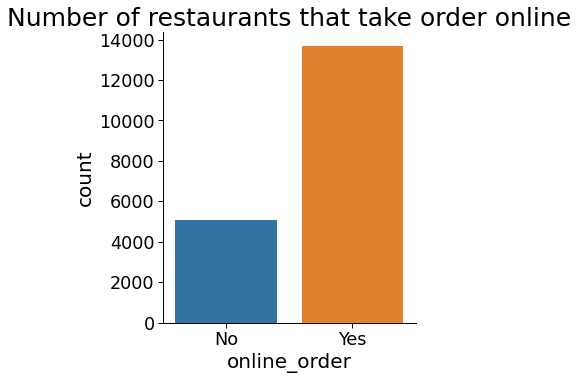

In [ ]:
# plotting number of restaurtants that take online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})
sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

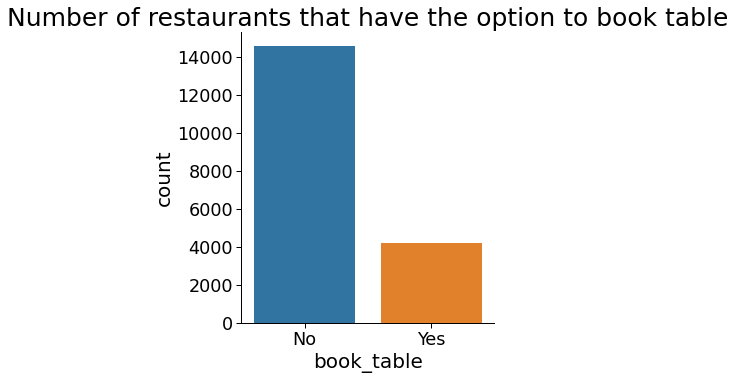

In [ ]:
# plotting number of restaurants that have the option to book table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

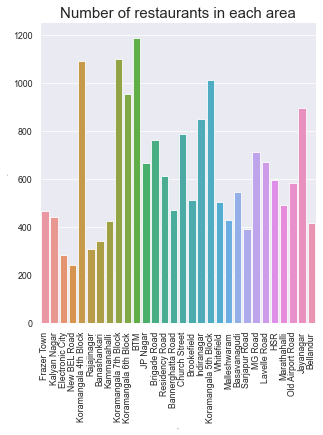

In [ ]:
# plotting number of restaurants in each city

sns.set(rc={'figure.figsize':(28.7,20.27)})
sns.set_context("paper", font_scale = 1, rc={"font.size": 20,"axes.titlesize": 15,"axes.labelsize": 1})
b = sns.catplot(data = df, kind = 'count', x = 'list_city')
plt.title('Number of restaurants in each area')
b.set_xticklabels(rotation = 90)
plt.show()

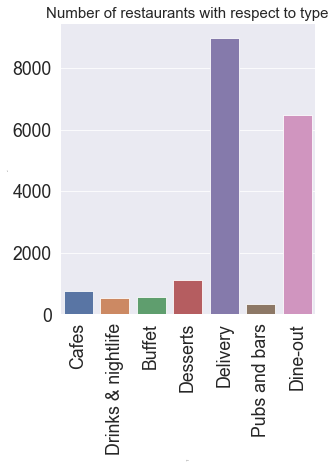

In [ ]:
# plotting number of restaurants in each city

sns.set(rc={'figure.figsize':(38.7,20.27)})
sns.set_context("paper", font_scale = 2, rc={"font.size": 20,"axes.titlesize": 15,"axes.labelsize": 1})
b = sns.catplot(data = df, kind = 'count', x = 'list_type')
plt.title('Number of restaurants with respect to type')
b.set_xticklabels(rotation = 90)
plt.show()

<AxesSubplot:>

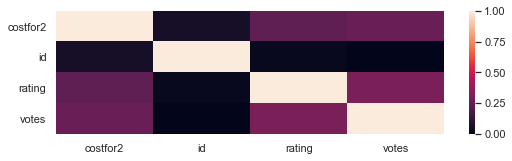

In [ ]:


sns.set(rc={'figure.figsize':(8.7,2.27)})# Calculate correlations
corr = df.corr()

# Heatmap
sns.heatmap(corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '2.0999999046325684'),
  Text(2, 0, '2.200000047683716'),
  Text(3, 0, '2.299999952316284'),
  Text(4, 0, '2.4000000953674316'),
  Text(5, 0, '2.5'),
  Text(6, 0, '2.5999999046325684'),
  Text(7, 0, '2.700000047683716'),
  Text(8, 0, '2.799999952316284'),
  Text(9, 0, '2.9000000953674316'),
  Text(10, 0, '3.0'),
  Text(11, 0, '3.0999999046325684'),
  Text(12, 0, '3.200000047683716'),
  Text(13, 0, '3.299999952316284'),
  Text(14, 0, '3.4000000953674316'),
  Text(15, 0, '3.5'),
  Text(16, 0, '3.5999999046325684'),
  Text(17, 0, '3.700000047683716'),
  Text(18, 0, '3.799999952316284'),
  Text(19, 0, '3.9000000953674316'),
  Text(20, 0, '4.0'),
  Text(21, 0, '4.099999904632568'),
  Text(22, 0, '4.199999809265137'),
  Text(23, 0, '4.300000190734863'),
  Text(24, 0, '4.400000095367432'),
  Text(25, 0, '4.5'),
  Text(26, 0

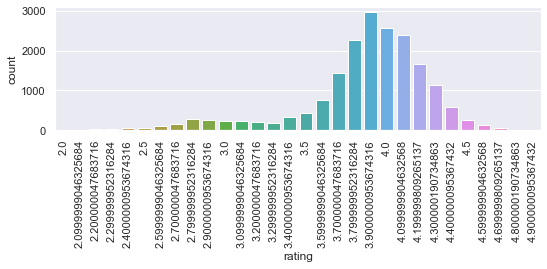

In [ ]:

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='rating', data=df)

# Rotate x-labels
plt.xticks(rotation=90)

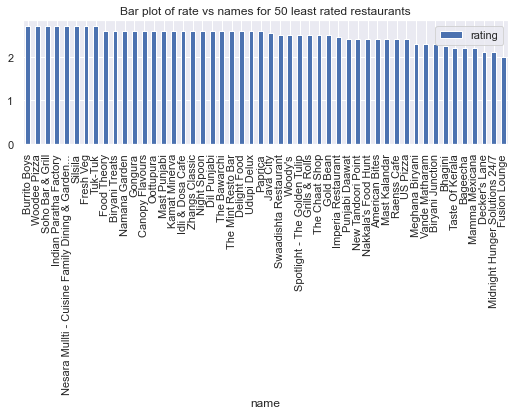

<Figure size 2880x72 with 0 Axes>

In [ ]:
# bar plot of last 50 restaurants as per rate
# a = a[0: len(a)-1]
a = pd.DataFrame(df['rating'])
a['name'] = df['name']
a = a.dropna(axis = 0, how ='any')
a[['rating', 'name']].groupby(['name']).median().sort_values("rating", ascending = False).tail(50).plot.bar()
plt.title('Bar plot of rate vs names for 50 least rated restaurants')
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(1)
plt.show()

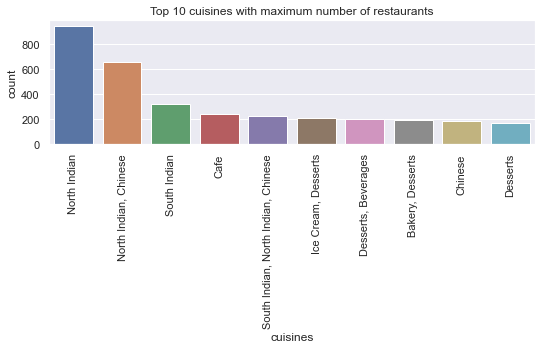

In [ ]:
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

In [ ]:
print("What type of food do you want to eat??")
ALL = 'ALL'
def remove(string):
    return string.replace(", ", ",")
rows1 = session.execute('SELECT * FROM zomato')

maping1={}
for user_row in rows1:
    maping1[remove(user_row.cuisines)]=user_row.name
# print(maping1)

quer = session.execute('SELECT * FROM zomato')

cuis=[]
for row in quer:
    r=remove(row.cuisines)
    cuis.append(r.split(','))


all_cuis = list(chain.from_iterable(cuis))
all_cuis=np.array(all_cuis)
all_cuis=np.unique(all_cuis)

print(len(all_cuis)," cuisines to choose from")
# print(all_cuis[0:20])

typeofcuis = widgets.Dropdown(options =all_cuis)
cuis_selected=[]
def cuis_eventhandler(change):
    cuis_selected.append(change.new)
    ans1=[]
    for cuis_list,rest_name in maping1.items():
        if cuis_selected[len(cuis_selected)-1] in cuis_list:
            ans1.append(rest_name)

    print(len(ans1),"restaurants serve",change.new," type of food")
    display(ans1)
typeofcuis.observe(cuis_eventhandler, names='value')
display(typeofcuis)



What type of food do you want to eat??
96  cuisines to choose from


c:\python\python365\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=('Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Awadh…

In [ ]:
print(cuis_selected[len(cuis_selected)-1])

BBQ


In [ ]:
print("What type of restaurant do you want to go to??")
# ALL = 'ALL'

rows2 = session.execute('SELECT * FROM zomato')
def remove(string):
    return string.replace(", ", ",")
maping2={}
for user_row1 in rows2:
    str1=remove(user_row1.rest_type)
    maping2[str1]=user_row1.name
# print(maping1)

quer1 = session.execute('SELECT * FROM zomato')

types=[]
for row in quer1:
    types.append((remove(row.rest_type)).split(','))


all_types = list(chain.from_iterable(types))
all_types=np.array(all_types)
all_types=np.unique(all_types)
print(len(all_types)," restuarant types to choose from")
# print(all_cuis[0:20])

typeofrestlist = widgets.Dropdown(options =all_types)
type_selected=[]
def type_eventhandler(change):
    type_selected.append(change.new)
    ans2=[]
    for type_list,rest_name in maping2.items():
        if change.new in type_list:
            ans2.append(rest_name)

    display(ans2)
typeofrestlist.observe(type_eventhandler, names='value')
display(typeofrestlist)

What type of restaurant do you want to go to??
21  restuarant types to choose from


c:\python\python365\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=('Bakery', 'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club', 'Delivery', 'Dessert Parl…

In [ ]:

print(type_selected[len(type_selected)-1])

Cafe


In [ ]:
mincostfor2=df['costfor2'].min()
maxcostfor2=df['costfor2'].max()
min_rating=df['rating'].min()
max_rating=df['rating'].max()
maxvotes=df['votes'].max()
minvotes=df['votes'].min()

In [ ]:
print("SMART RESTAURANT CHOICE APPLICATION\n\nBefore we get started, let us get to know your details!!")
print("Enter name")
cname=input()
print("Enter age")
age=int(input())

print("Enter your budget range, you can either slide through the slider or type in your budget")
min_budget = widgets.IntSlider(min=mincostfor2, max=maxcostfor2, step=50, value=100)
min_text = widgets.IntText()
display(min_budget, min_text)
widgets.jslink((min_budget, 'value'), (min_text, 'value'))
# print(text.value)
max_budget = widgets.IntSlider(min=mincostfor2, max=maxcostfor2, step=50, value=100)
max_text = widgets.IntText()
display(max_budget, max_text)
widgets.jslink((max_budget, 'value'), (max_text, 'value'))


print("Filter by rating(0-5)")
lower_rate = widgets.FloatSlider(min=0, max=5, step=0.1, value=2.0)
upper_rate = widgets.FloatSlider(min=0, max=5, step=0.1, value=2.0)
display(lower_rate)
display(upper_rate)


print("Filter by votes")
lower_vote = widgets.IntSlider(min=minvotes, max=maxvotes, step=1, value=20)
upper_vote = widgets.IntSlider(min=minvotes, max=maxvotes, step=1, value=20)
display(lower_vote)
display(upper_vote)

print("Tell us where you wish to travel to snack up")
ALL = 'ALL'
lives_in=[]
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
dropdown_place = widgets.Dropdown(options =unique_sorted_values_plus_ALL(df.list_city))
def dropdown_place_eventhandler(change):
    lives_in.append(change.new)

dropdown_place.observe(dropdown_place_eventhandler, names='value')
display(dropdown_place)

print("Do you want the restaurant to have a table booking option")
bookings=widgets.Dropdown(options=['Yes','No'])
display(bookings)

print("Do you want the restaurant to have online ordering option")
online=widgets.Dropdown(options=['Yes','No'])
display(online)


print("What type of food do you want to eat??")
ALL = 'ALL'
def remove(string):
    return string.replace(", ", ",")
rows1 = session.execute('SELECT * FROM zomato')

maping1={}
for user_row in rows1:
    maping1[remove(user_row.cuisines)]=user_row.name
# print(maping1)

quer = session.execute('SELECT * FROM zomato')

cuis=[]
for row in quer:
    r=remove(row.cuisines)
    cuis.append(r.split(','))


all_cuis = list(chain.from_iterable(cuis))
all_cuis=np.array(all_cuis)
all_cuis=np.unique(all_cuis)

print(len(all_cuis)," cuisines to choose from")
# print(all_cuis[0:20])

typeofcuis = widgets.Dropdown(options =all_cuis)
cuis_selected=[]
def cuis_eventhandler(change):
    cuis_selected.append(change.new)
    ans1=[]
    for cuis_list,rest_name in maping1.items():
        if cuis_selected[len(cuis_selected)-1] in cuis_list:
            ans1.append(rest_name)

#     print(len(ans1),"restaurants serve",change.new," type of food")
#     display(ans1)
typeofcuis.observe(cuis_eventhandler, names='value')
display(typeofcuis)



SMART RESTAURANT CHOICE APPLICATION

Before we get started, let us get to know your details!!
Enter name
nikhil sk
Enter age
21
Enter your budget range, you can either slide through the slider or type in your budget


IntSlider(value=100, max=6000, min=40, step=50)

IntText(value=0)

IntSlider(value=100, max=6000, min=40, step=50)

IntText(value=0)

Filter by rating(0-5)


FloatSlider(value=2.0, max=5.0)

FloatSlider(value=2.0, max=5.0)

Filter by votes


IntSlider(value=20, max=16345)

IntSlider(value=20, max=16345)

Tell us where you wish to travel to snack up


Dropdown(options=('ALL', 'BTM', 'Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brigade Roa…

Do you want the restaurant to have a table booking option


Dropdown(options=('Yes', 'No'), value='Yes')

Do you want the restaurant to have online ordering option


Dropdown(options=('Yes', 'No'), value='Yes')

What type of food do you want to eat??
96  cuisines to choose from


Dropdown(options=('Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Awadh…

In [ ]:
print("Hey",cname,",\nThank you for using our application\nYour details:\nBudget range: ",min_text.value," - ",max_text.value)
print("Rating range: ",lower_rate.value," - ",upper_rate.value)
print("Votes range: ",lower_vote.value," - ",upper_vote.value)
print("Destination point: ",lives_in[len(lives_in)-1])
print("Table booking option: ",bookings.value)
print("Online ordering option: ",online.value)
print("Cuisine selected ",cuis_selected[len(cuis_selected)-1])

Hey nikhil sk ,
Thank you for using our application
Your details:
Budget range:  545  -  1990
Rating range:  0.0  -  5.0
Votes range:  20  -  16345
Destination point:  Jayanagar
Table booking option:  Yes
Online ordering option:  Yes
Cuisine selected  Biryani


In [ ]:
filter = df.loc[(df['online_order']==online.value) & (df['book_table']==bookings.value) & (df['costfor2'] >= min_text.value) & (df['costfor2'] <= max_text.value) & (df['rating']>=lower_rate.value) & (df['rating']<=upper_rate.value) & (df['votes']>=lower_vote.value) & (df['votes']<=upper_vote.value) & ((df['list_city']==lives_in[len(lives_in)-1])| (df['location']==lives_in[len(lives_in)-1])) & (df['cuisines'].str.contains(cuis_selected[len(cuis_selected)-1],case=False)) ]
print(filter['name'].unique())


['Desi Rasoi' 'The Yellow Chilli' 'Andhra Ruchulu' "Dadi's Dum Biryani"
 'Malabar Bay' 'Savoury - Sea Shell Restaurant' 'Naati Manae'
 'Salt - Indian Restaurant Bar & Grill' 'Sea Spice by 7 Star']


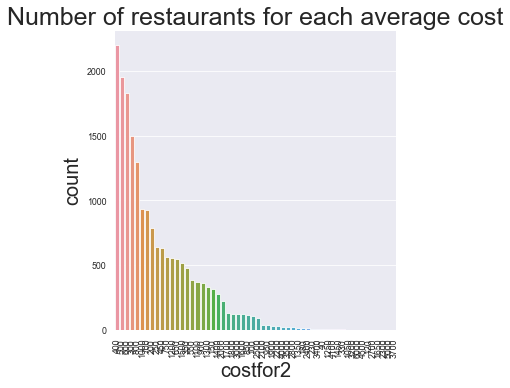

In [ ]:
# plotting count plot for avg_cost
sns.set_context("paper", font_scale = 1, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})
b = sns.catplot(data = df, kind = 'count', x = 'costfor2', order = df['costfor2'].value_counts().index)
plt.title('Number of restaurants for each average cost')
b.set_xticklabels(rotation = 90)
plt.show()

In [ ]:
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=0)

IntText(value=0)

Link(source=(IntSlider(value=0), 'value'), target=(IntText(value=0), 'value'))

In [ ]:
lives_in=[]

In [ ]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
dropdown_year = widgets.Dropdown(options =unique_sorted_values_plus_ALL(df.list_city))
def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        lives_in="all"

    else:
        lives_in=change.new
#         print(lives_in)
dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)
print(lives_in)

Dropdown(options=('ALL', 'BTM', 'Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brigade Roa…

[]
